##  **Shallow CNN Demo** ##

## **Optuna Hyperparameter Tuning** ##
*{'learning_rate': 0.0009416438293819228, 'dropout_prob': 0.3881486564540837, 'batch_size': 16}*


 **Name of notebook with run** : 4Nov 2024 -PyTorch ds

## **Class imbalance** ##

Class Distribution:
Train: {'Fake': 8879, 'Real': 9462}
Test: {'Fake': 1902, 'Real': 2027}
Validation: {'Fake': 1903, 'Real': 2029}


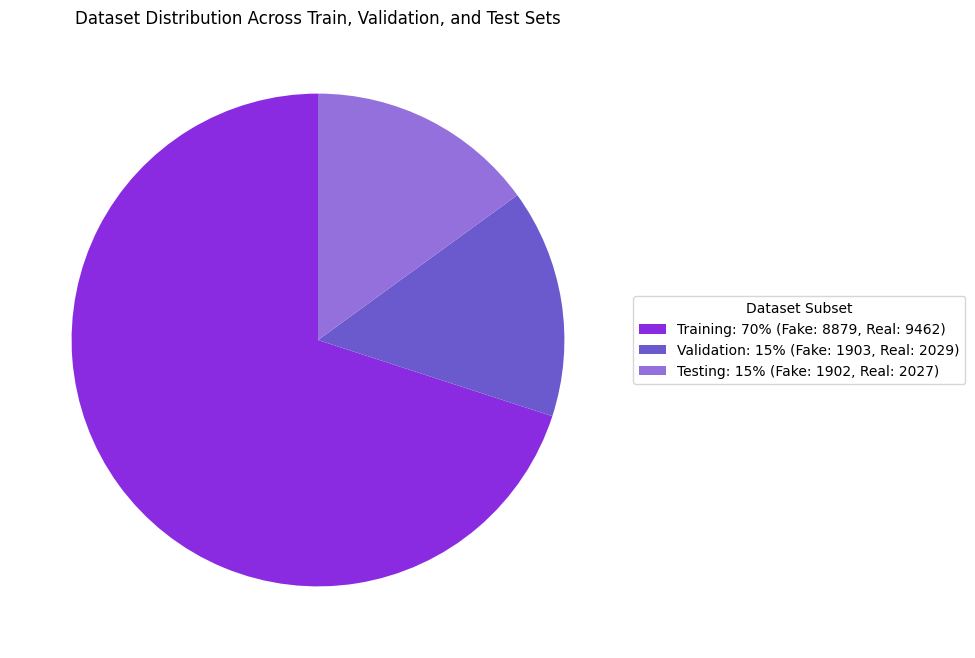

In [1]:
import os
import matplotlib.pyplot as plt

# Step 1: Define the paths to the folders and initialize data_distribution
base_path = "/kaggle/input/tafahas-spectrograms"  # Update this path if necessary
folders = ["Train", "Test", "Validation"]
classes = ["Fake", "Real"]

# Dictionary to store the count of each class in each folder
data_distribution = {folder: {cls: 0 for cls in classes} for folder in folders}

# Count the number of images in each class for each folder
for folder in folders:
    for cls in classes:
        path = os.path.join(base_path, folder, cls)
        data_distribution[folder][cls] = len(os.listdir(path))

# Display the distribution
print("Class Distribution:")
for folder in data_distribution:
    print(f"{folder}: {data_distribution[folder]}")

# Step 2: Define the counts for each subset
train_count = sum(data_distribution["Train"].values())
val_count = sum(data_distribution["Validation"].values())
test_count = sum(data_distribution["Test"].values())

# Step 3: Define the labels and values
labels = ["Training", "Validation", "Testing"]
sizes = [train_count, val_count, test_count]

# Legend labels with rounded percentages and specific data counts
legend_labels = [
    f"Training: 70% (Fake: {data_distribution['Train']['Fake']}, Real: {data_distribution['Train']['Real']})",
    f"Validation: 15% (Fake: {data_distribution['Validation']['Fake']}, Real: {data_distribution['Validation']['Real']})",
    f"Testing: 15% (Fake: {data_distribution['Test']['Fake']}, Real: {data_distribution['Test']['Real']})"
]

# Updated colors to suit a purple-blue themed poster
theme_colors = ['#8A2BE2', '#6A5ACD', '#9370DB']  # Shades of purple

# Step 4: Plot the pie chart without the internal percentages
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, colors=theme_colors, startangle=90)
plt.title("Dataset Distribution Across Train, Validation, and Test Sets")

# Add the legend
plt.legend(legend_labels, title="Dataset Subset", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


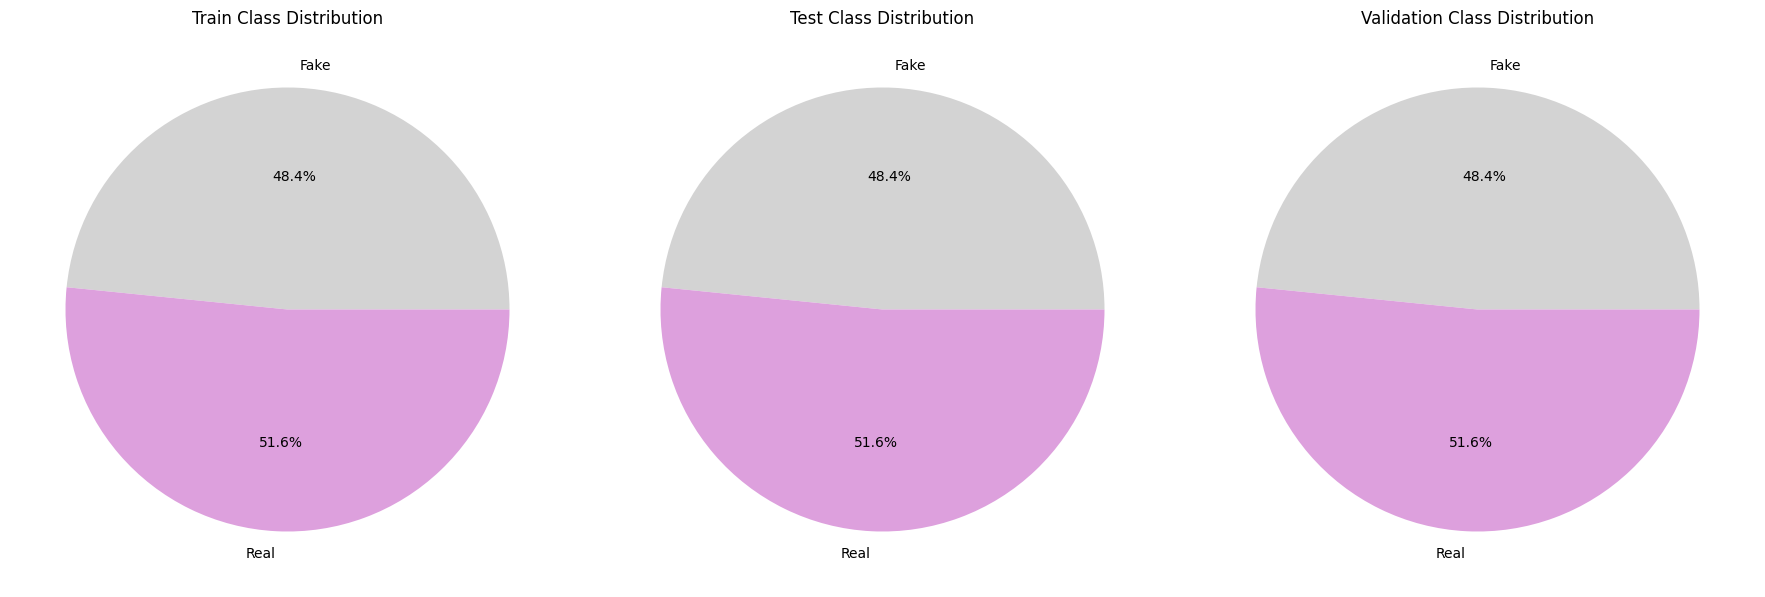

In [2]:
import matplotlib.pyplot as plt
import os

# Dummy data
folders = ["Train", "Test", "Validation"]
data_distribution = {
    "Train": {"Fake": 48.4, "Real": 51.6},
    "Test": {"Fake": 48.4, "Real": 51.6},
    "Validation": {"Fake": 48.4, "Real": 51.6},
}

# Create a figure for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Updated colors for the chart (Gray and Pastel Purple)
colors = ['lightgray', 'plum']

for idx, folder in enumerate(folders):
    counts = [data_distribution[folder]["Fake"], data_distribution[folder]["Real"]]
    labels = ["Fake", "Real"]
    axes[idx].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)
    axes[idx].set_title(f"{folder} Class Distribution")

plt.suptitle("")
plt.tight_layout()

# Save the figure as an image
output_dir = "/mnt/data/"
output_path = os.path.join(output_dir, "class_distribution_pie_chart.png")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the chart
plt.savefig(output_path)
plt.show()


## **While there is a consistent difference of about 6.5% in favor of the Real class across all sets** ##

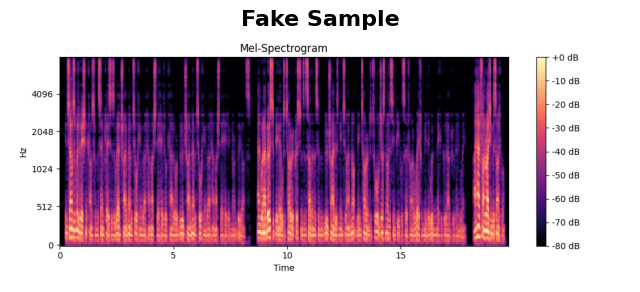

In [3]:
import cv2
import matplotlib.pyplot as plt

# Define the source path of the image in your data
source_path = "/kaggle/input/tafahas-spectrograms/Test/Fake/22155.png"  # Replace with your source image path

# Load the image using OpenCV
image = cv2.imread(source_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title("Fake Sample", fontsize=16, fontweight="bold")
plt.axis("off")  # Hide axes for better visualization
plt.show()


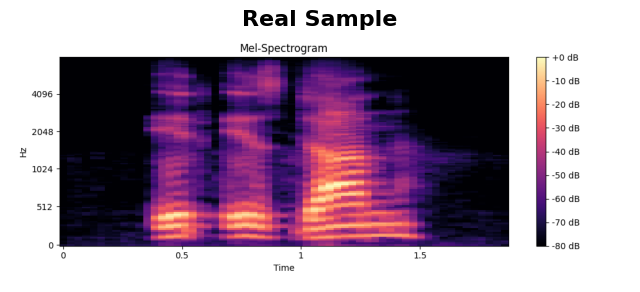

In [4]:
import cv2
import matplotlib.pyplot as plt

# Define the source path of the image in your data
source_path = "/kaggle/input/tafahas-spectrograms/Test/Real/22288.png"  # Replace with your source image path

# Load the image using OpenCV
image = cv2.imread(source_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title("Real Sample", fontsize=16, fontweight="bold")
plt.axis("off")  # Hide axes for better visualization
plt.show()


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


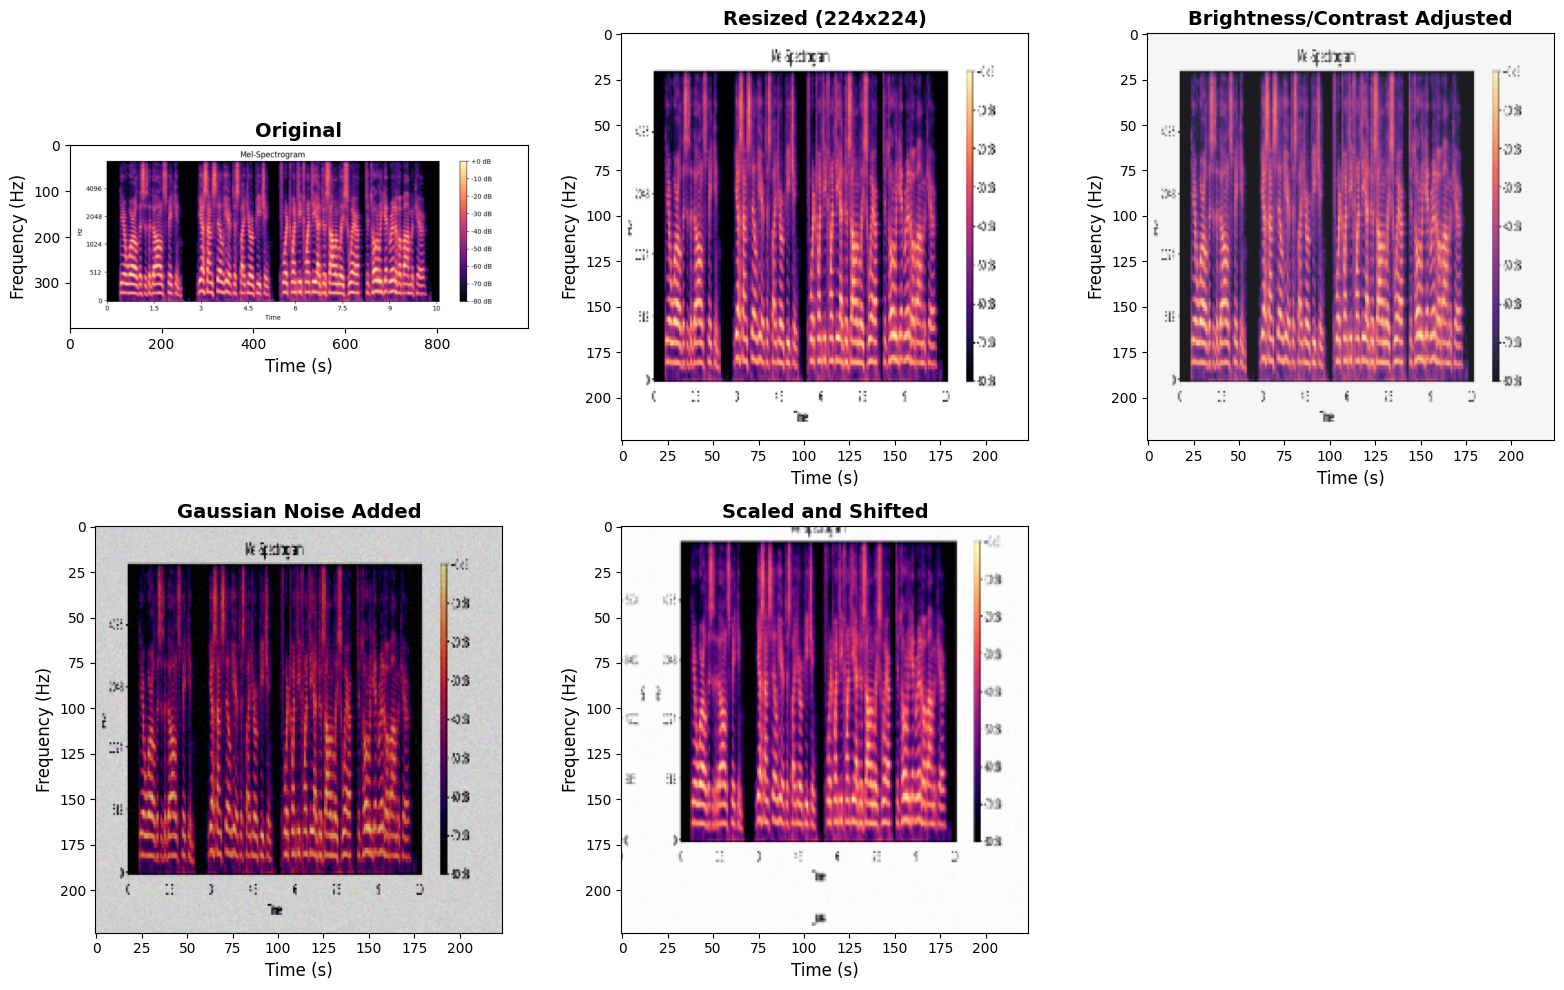

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import albumentations as A

# Define the path to a single spectrogram image
image_path = "/kaggle/input/tafahas-spectrograms/Train/Fake/10002.png"  # Replace with your image path

# Load the original image
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Step-by-step transformations
steps = [
    ("Original", original_image),
    ("Resized (224x224)", A.Resize(224, 224)(image=original_image)["image"]),
    ("Brightness/Contrast Adjusted", A.RandomBrightnessContrast(p=1.0)(image=A.Resize(224, 224)(image=original_image)["image"])["image"]),
    ("Gaussian Noise Added", A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)(image=A.RandomBrightnessContrast(p=1.0)(image=A.Resize(224, 224)(image=original_image)["image"])["image"])["image"]),
    ("Scaled and Shifted", A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=0, p=1.0)(image=A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)(image=A.RandomBrightnessContrast(p=1.0)(image=A.Resize(224, 224)(image=original_image)["image"])["image"])["image"])["image"])
]

# Combine all steps into a single image
plt.figure(figsize=(16, 10))  # Adjust the figure size for clarity

for i, (title, img) in enumerate(steps):
    plt.subplot(2, 3, i + 1)  # Create a subplot grid (2 rows, 3 columns)
    plt.imshow(img)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Frequency (Hz)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

# Adjust layout to fit all subplots
plt.tight_layout()

# Display the combined image
plt.show()


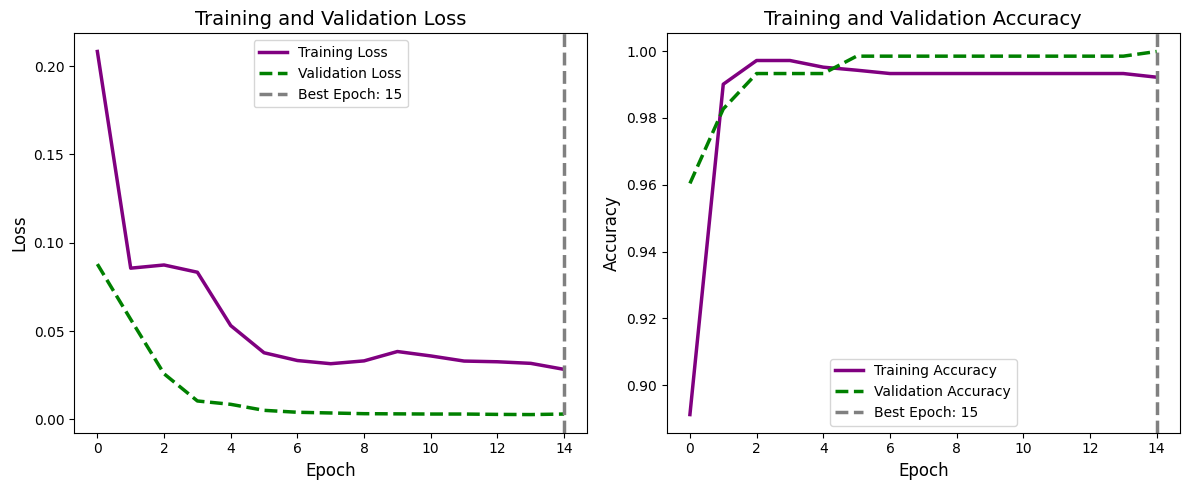

In [6]:
# Filled data from the screenshot
train_losses = [0.2083, 0.0856, 0.0874, 0.0833, 0.0531, 0.0377, 0.0333, 0.0315, 0.0331, 0.0384, 0.0359, 0.0330, 0.0326, 0.0317, 0.0283]
val_losses = [0.0879, 0.0566, 0.0258, 0.0104, 0.0085, 0.0051, 0.0040, 0.0036, 0.0032, 0.0031, 0.0030, 0.0030, 0.0028, 0.0027, 0.0030]
train_accuracies = [0.8912, 0.9901, 0.9972, 0.9972, 0.9952, 0.9943, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9922]
val_accuracies = [0.9604, 0.9827, 0.9933, 0.9933, 0.9933, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9999]
best_epoch = 14

# Visualization code
import matplotlib.pyplot as plt

# Set a white background for both figure and axes
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(12, 5))

# Training and Validation Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", color="purple", linewidth=2.5)
plt.plot(val_losses, label="Validation Loss", color="green", linestyle="--", linewidth=2.5)
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14)  # Removed bold
plt.legend(fontsize=10)

# Training and Validation Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", color="purple", linewidth=2.5)
plt.plot(val_accuracies, label="Validation Accuracy", color="green", linestyle="--", linewidth=2.5)
plt.axvline(x=best_epoch, color="gray", linestyle="--", linewidth=2.5, label=f"Best Epoch: {best_epoch+1}")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14)  # Removed bold
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


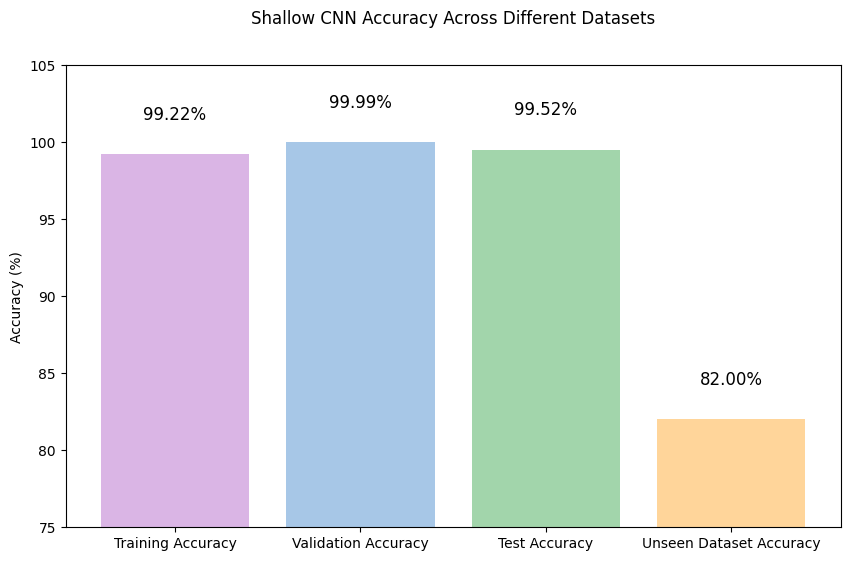

In [7]:
import matplotlib.pyplot as plt

# Define the accuracies for each subset
train_accuracies = [0.8912, 0.9901, 0.9972, 0.9972, 0.9952, 0.9943, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9933, 0.9922]
val_accuracies = [0.9604, 0.9827, 0.9933, 0.9933, 0.9933, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9985, 0.9999]
best_epoch = 14  # Index of the best epoch in the provided data

train_accuracy = train_accuracies[best_epoch] * 100  # Convert to percentage
val_accuracy = val_accuracies[best_epoch] * 100
test_accuracy = 99.52  # Test accuracy you've provided
unseen_accuracy = 82.0  # Unseen dataset accuracy you've provided

# Labels and values for the bar chart
labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Unseen Dataset Accuracy']
accuracies = [train_accuracy, val_accuracy, test_accuracy, unseen_accuracy]

# Plotting the bar chart with pastel colors
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color=['#DAB5E5', '#A7C7E7', '#A2D5AB', '#FFD59A'])  # Pastel colors
plt.ylim(75, 105)  # Slightly increase the y-axis range for more space above bars
plt.ylabel('Accuracy (%)')
plt.title('Shallow CNN Accuracy Across Different Datasets', pad=30)  # Increase padding for title

# Annotating each bar with the exact accuracy value, positioned even higher for readability
for bar, accuracy in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height() + 2,               # Y position further above each bar
        f"{accuracy:.2f}%",                 # Text to display
        ha='center', va='bottom', color='black', fontsize=12  # Removed fontweight='bold'
    )

plt.show()


## **Explain Models Parts** ##

## *At begining* ##

In [ ]:
# Set random seed for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

# Data Preprocessing and Augmentation
def get_transforms():
    return A.Compose([
        A.RandomBrightnessContrast(p=0.2),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.2),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.3),
        A.CoarseDropout(max_holes=1, max_height=20, max_width=100, min_height=10, min_width=20, p=0.3),
        A.CoarseDropout(max_holes=1, max_height=100, max_width=20, min_height=20, min_width=10, p=0.3),
        A.ShiftScaleRotate(shift_limit_x=0.1, shift_limit_y=0, scale_limit=0, rotate_limit=0, p=0.3)
    ])

def augment_image(image):
    augmented = get_transforms()(image=image)["image"]
    return torch.tensor(augmented / 255.0).float().permute(2, 0, 1)

# DataLoader Setup
def load_data(train_dir, test_dir, val_dir, batch_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda img: augment_image(np.array(img)))
    ])
    
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)
    val_data = datasets.ImageFolder(val_dir, transform=transform)
    
    print("Class to index mapping:", train_data.class_to_idx)
    assert train_data.class_to_idx == {'Fake': 0, 'Real': 1}, "Class labels must be FAKE: 0 and REAL: 1"
    
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader, val_loader, train_data.class_to_idx


## **Handeling imbalance dataset** ##

In [ ]:
# Calculate Class Weights
def calculate_class_weights(train_dir):
    fake_count = len(os.listdir(os.path.join(train_dir, 'Fake')))
    real_count = len(os.listdir(os.path.join(train_dir, 'Real')))
    class_labels = np.array([0, 1])  # Convert to numpy array
    y = [0] * fake_count + [1] * real_count
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y)
    return torch.tensor(class_weights, dtype=torch.float32).to(device)


## **Model Architecture** ##

In [ ]:
# Model Architecture
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [9]:
pip install torch-summary torchviz


Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchviz import make_dot

# Define the SpectrogramCNN Model
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate the model
model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=0.5).to(device)

# Visualize with torchsummary
print("Model Architecture Summary:")
print(summary(model, input_size=(3, 224, 224)))

# Generate dummy input for torchviz visualization
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Forward pass to create graph
output = model(dummy_input)

# Visualize with torchviz
print("Generating model architecture graph...")
graph = make_dot(output, params=dict(model.named_parameters()))
graph.render("model_architecture", format="png")
print("Graph saved as 'model_architecture.png'")


Model Architecture Summary:
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            784
├─Conv2d: 1-2                            9,624
├─Conv2d: 1-3                            12,320
├─Conv2d: 1-4                            16,448
├─MaxPool2d: 1-5                         --
├─Dropout: 1-6                           --
├─Linear: 1-7                            1,278,080
├─Linear: 1-8                            129
Total params: 1,317,385
Trainable params: 1,317,385
Non-trainable params: 0
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            784
├─Conv2d: 1-2                            9,624
├─Conv2d: 1-3                            12,320
├─Conv2d: 1-4                            16,448
├─MaxPool2d: 1-5                         --
├─Dropout: 1-6                           --
├─Linear: 1-7                            1,278,080
├─Linear: 1-8                            129
Total params: 1,317,385
Trainable params: 1,317,385
No

## **Main Function** ##

In [ ]:
# Main Function
def main():
    learning_rate = 0.0009416438293819228
    dropout_prob = 0.3881486564540837
    batch_size = 16

    train_loader, test_loader, val_loader, class_to_idx = load_data(
        '/kaggle/input/tafahas-spectrograms/Train', 
        '/kaggle/input/tafahas-spectrograms/Test', 
        '/kaggle/input/tafahas-spectrograms/Validation', 
        batch_size
    )

    # Calculate class weights
    class_weights = calculate_class_weights('/kaggle/input/tafahas-spectrograms/Train')

    model = SpectrogramCNN(in_channels=3, num_classes=1, dropout_prob=dropout_prob).to(device)
    train(train_loader, val_loader, model, class_weights=class_weights, epochs=15, patience=5, save_path="allData-pth--224 RGB.pth")

    # Load the entire model for evaluation
    if os.path.exists("allData-pth--224 RGB.pth"):
        model = torch.load("allData-pth--224 RGB.pth")  # Directly loads the entire model
        model.to(device)
        print("Model loaded successfully from 'allData-pth--224 RGB.pth'")
    else:
        print("Model file 'allData-pth--224 RGB.pth' does not exist. Ensure training completed successfully.")

if __name__ == "__main__":
    main()


Parameters:

    model.parameters() (weights and biases of layers).
    class_weights (adjusts for imbalanced classes).
    best_val_loss, train_losses, val_losses.
    train_accuracies, val_accuracies.
    Saved model (allData-pth--224 RGB.pth).

Hyperparameters:

    Learning rate: 0.0009416438293819228.
    Dropout probability: 0.3881486564540837.
    Batch size: 16.
    Number of epochs: 15.
    Patience for early stopping: 5.
    Data augmentation parameters (e.g., Brightness/Contrast, Gaussian Noise).
    Optimizer: Adam.
    Loss function: BCEWithLogitsLoss.

## **MODEL PREDUCTION AT ANY SAMPLE** ##

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from PIL import Image

# Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the SpectrogramCNN Model Class
class SpectrogramCNN(nn.Module):
    def __init__(self, in_channels, num_classes, dropout_prob=0.5):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=5, stride=1, padding=1)
        self.conv3 = nn.Conv2d(24, 32, kernel_size=4, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(2, 4), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc1 = nn.Linear(self._get_conv_output((in_channels, 224, 224)), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            x = torch.zeros(1, *shape)
            x = self.pool(nn.functional.relu(self.conv1(x)))
            x = self.pool(nn.functional.relu(self.conv2(x)))
            x = self.pool(nn.functional.relu(self.conv3(x)))
            x = self.pool(nn.functional.relu(self.conv4(x)))
            return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Load the Trained Model with weights_only=True to avoid security warnings
model_path = "/kaggle/input/alldata-pt-224-rgb-m/model_converted.pt"
model = torch.load(model_path, map_location=device)  # Change if you want to use weights_only=True
model.to(device)
model.eval()

# Preprocessing Function for the Input Image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Prediction Function
def predict_image(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(image)
        prob = torch.sigmoid(output).item()
    prediction = "Real" if prob >= 0.5 else "Fake"
    print(f"Predicted Probability of being 'Real': {prob:.4f}")
    print(f"Predicted Class: {prediction}")

# Provide the path to the image
image_path = "/kaggle/input/the-fake-or-real-dataset-specto/fake/file1244.png"  # Replace with the actual path
predict_image(image_path)
